In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


# Load dữ liệu
Mat-Biec.txt : Tiểu thuyết Mắt Biếc của nhà văn Nguyễn Nhật Ánh \\
VDic_uni.txt : Từ điển tiếng Việt \\
vietnamese-stopwords.txt: Danh sách stopwords (hư từ) trong tiếng Việt

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import itertools
import numpy as np

In [3]:
context = open("/content/gdrive/MyDrive/Data_Science/Project-Mat-biec/Data/Mat-Biec.txt", "r").read()
tudien = open("/content/gdrive/MyDrive/Data_Science/Project-Mat-biec/Data/VDic_uni.txt", "r").read()
#What if we remove stopword? Vietnamese stopword is colecting from 
# https://github.com/stopwords/vietnamese-stopwords/blob/master/vietnamese-stopwords.txt
stop_word= pd.read_table("/content/gdrive/MyDrive/Data_Science/Project-Mat-biec/Data/vietnamese-stopwords.txt", on_bad_lines='warn', header=None)
print(context[:1000])

            Mục lục

Chương 1
Chương 2
Chương 3
Chương 4
Chương 5
Chương 6
Chương 7
Chương 8
Chương 9
Chương 10
                           MẮT BIẾC
                              Nguyễn Nhật Ánh

                                  Chương 1

    Hồi còn nhỏ, nhỏ xíu, tôi không có bạn gái. Suốt ngày tôi chỉ chơi với...
mẹ tôi và bà nội tôi. Mẹ tôi rất thương tôi nhưng vì mẹ sợ ba nên ít khi mẹ
che chở được tôi trước những trận đòn của ba tôi. Bà tôi thì lại khác. Bà sinh
ra ba nên ba phải sợ bà. Điều đó thật may mắn đối với tôi.

    Hồi nhỏ tôi rất nghịch, ăn đòn khá thường xuyên. Điều đó buộc đầu óc
non nớt của tôi phải tìm cách đối phó với những trận đòn trừng phạt của ba
tôi. Mỗi lần phạm lỗi, hễ thấy ba tôi dợm rút cây roi mây ra khỏi vách là tôi
vội vàng chạy qua nhà bà tôi. Bà tôi thường nằm trên cái sập gỗ lim đen
bóng, bên dưới là những ngăn kéo đựng thuốc bắc của ông tôi. Bà nằm đó,
miệng bỏm bẻm nhai trầu, tay phe phẩy chiếc quạt mo cau với một dáng điệu
thong thả.

   - Bà ơi

#### Nhìn qua về tiểu thuyết

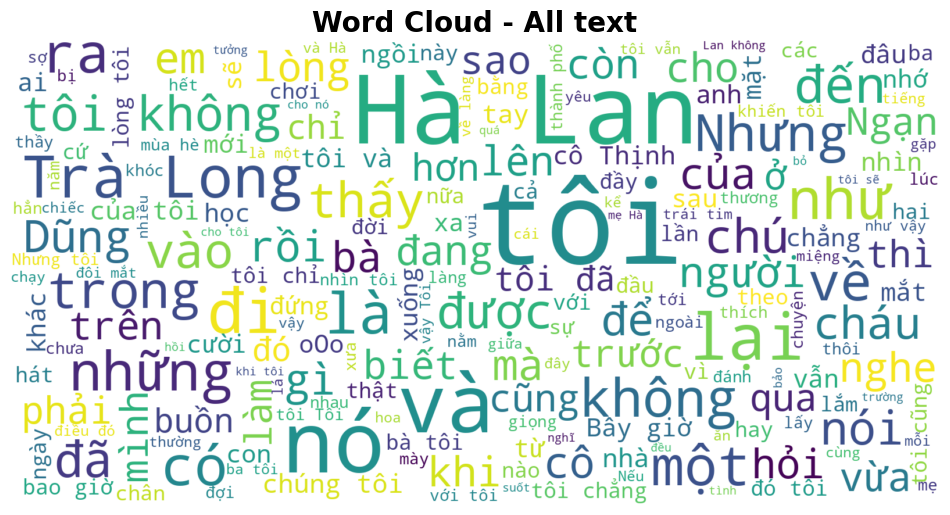

------


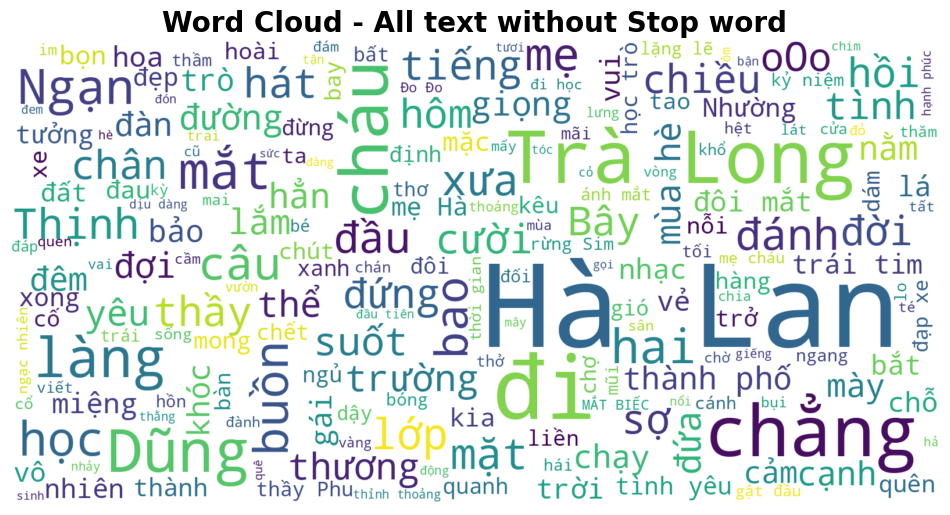

In [4]:
wordcloud = WordCloud(background_color='white', width=1600, height=800,max_font_size=200).generate(str(context))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - All text',fontsize=20,fontweight='bold')
plt.show();
# Recreate word cloud without stopwords
stop_word = stop_word[0].tolist()
print('------')
##
wordcloud = WordCloud(background_color='white', width=1600, height=800,max_font_size=200, stopwords= stop_word).generate(str(context))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - All text without Stop word',fontsize=20,fontweight='bold')
plt.show();

### See how the context is display
We do need to clean it up the text file, remove \n, extra space bar. Remove special character \x0c. Replace ... / ! / ? by . and then split the whole text by /./

In [5]:
# See context
context

'\x0c            Mục lục\n\nChương 1\nChương 2\nChương 3\nChương 4\nChương 5\nChương 6\nChương 7\nChương 8\nChương 9\nChương 10\n\x0c                           MẮT BIẾC\n                              Nguyễn Nhật Ánh\n\n                                  Chương 1\n\n    Hồi còn nhỏ, nhỏ xíu, tôi không có bạn gái. Suốt ngày tôi chỉ chơi với...\nmẹ tôi và bà nội tôi. Mẹ tôi rất thương tôi nhưng vì mẹ sợ ba nên ít khi mẹ\nche chở được tôi trước những trận đòn của ba tôi. Bà tôi thì lại khác. Bà sinh\nra ba nên ba phải sợ bà. Điều đó thật may mắn đối với tôi.\n\n    Hồi nhỏ tôi rất nghịch, ăn đòn khá thường xuyên. Điều đó buộc đầu óc\nnon nớt của tôi phải tìm cách đối phó với những trận đòn trừng phạt của ba\ntôi. Mỗi lần phạm lỗi, hễ thấy ba tôi dợm rút cây roi mây ra khỏi vách là tôi\nvội vàng chạy qua nhà bà tôi. Bà tôi thường nằm trên cái sập gỗ lim đen\nbóng, bên dưới là những ngăn kéo đựng thuốc bắc của ông tôi. Bà nằm đó,\nmiệng bỏm bẻm nhai trầu, tay phe phẩy chiếc quạt mo cau với mộ

In [6]:
text = (
    context
    .replace("\x0c", "")
    .replace("...", ".")
    .replace("!", ".")
    .replace("?", ".")
    .replace("\n", " ")
    .replace(";", "")
    .replace(":", "")
    .replace(",", "")
    )
text

'            Mục lục  Chương 1 Chương 2 Chương 3 Chương 4 Chương 5 Chương 6 Chương 7 Chương 8 Chương 9 Chương 10                            MẮT BIẾC                               Nguyễn Nhật Ánh                                    Chương 1      Hồi còn nhỏ nhỏ xíu tôi không có bạn gái. Suốt ngày tôi chỉ chơi với. mẹ tôi và bà nội tôi. Mẹ tôi rất thương tôi nhưng vì mẹ sợ ba nên ít khi mẹ che chở được tôi trước những trận đòn của ba tôi. Bà tôi thì lại khác. Bà sinh ra ba nên ba phải sợ bà. Điều đó thật may mắn đối với tôi.      Hồi nhỏ tôi rất nghịch ăn đòn khá thường xuyên. Điều đó buộc đầu óc non nớt của tôi phải tìm cách đối phó với những trận đòn trừng phạt của ba tôi. Mỗi lần phạm lỗi hễ thấy ba tôi dợm rút cây roi mây ra khỏi vách là tôi vội vàng chạy qua nhà bà tôi. Bà tôi thường nằm trên cái sập gỗ lim đen bóng bên dưới là những ngăn kéo đựng thuốc bắc của ông tôi. Bà nằm đó miệng bỏm bẻm nhai trầu tay phe phẩy chiếc quạt mo cau với một dáng điệu thong thả.     - Bà ơi bà. - Tôi

In [7]:
#Remove extra space bar
text0= " ".join(text.split())
# Make the whole context into lower case
text0 = text0.lower().split(".")
text = []
for string in text0:
  string = " ".join(string.split())
  text.append(string)

# Define function

In [8]:
def tap_hop_word(cauvan):
  # Split every word in the sentence
  check = cauvan.split()

  ### Creating a combination of words
  i = 1
  tohop_cau = [0]
  #make a loop that giving a set of words that the maximum length is 4
  while i<5:
    for item in range(len(check)):
      #combine word. 1 word, 2 word, 3 word, 4 word
      temp = " ".join(check[item: item+i])
      tohop_cau.append(temp)
    tohop_cau.append(i)
    i += 1
  # Finding the integer number that we had appended it to help spliting words
  number_indices = [i for i in range(len(tohop_cau)) if isinstance(tohop_cau[i], int)]
  # Making sublist, list for 1 word -> 4 words
  sublists = [tohop_cau[i:j] for i, j in zip(number_indices, number_indices[1:]+[None])]
  # Combine those list and make a DataFrame
  df = pd.DataFrame(sublists)
  # Remove duplicate value in each column
  df = df.apply(lambda x: x.drop_duplicates().reset_index(drop=True))
  # Replace NaN into None, later we will replace None into iteger 0
  df = df.replace({np.nan: None})
  return df

############################################
def kiemtranghia(cauvan):
  taphop = tap_hop_word(cauvan)
  ''' Check each cell in taphop with the Vietnamese dictionary
  if exist, then keep it.
  else, make it become an empty cell
  '''
  for column in taphop.columns[1:]:
    taphop[column] = (
        taphop[column]
        .apply(lambda x: x if pd.isna(x) else x if tudien.find(x) >= 0 else None)
        )
    
  taphop.drop(columns = [0], inplace=True)
  taphop = taphop.replace({None}, '')
  return taphop

#############################################
def nghia_cua_tu(cauvan):
  taphop = kiemtranghia(cauvan)
  '''1. Only keep the longest word meaning in each column
  2. Make a dictionary to count how many words and its frequency
  3. If key1 in key2 and both have the same values
        -> Remove the word has the length lessier
     If key1 in key2 but value1 > value2
        -> Update value1 by value1 - value2''' 
  max_length_values = list(taphop.apply(lambda x: max(x, key=len)))
  count = {x:max_length_values.count(x) for x in max_length_values}
  ## 3
  temp_remove = []
  temp_upvalue = {}
  for key1, value1 in count.items():
    for key2, value2 in count.items():
      if key1 != key2 and key1 in key2:
        if value1 == value2:
          temp_remove.append(key1)
        else:
          value1 = value1 - value2
          temp_upvalue[key1] = value1
  temp_remove = list(set(temp_remove))
  for item in temp_remove:
    count.pop(item)
  count.update(temp_upvalue)
  return count

In [9]:
timkiem = 'và'
caucu2 = 'cặp mèo mun kia và con cò này đẹp nhỉ'
cau2= nghia_cua_tu(caucu2)
print('Cho câu: ', caucu2)
print('Ta tách được: ', cau2)
print('Kiểm tra từ "và" có ở trong câu trên không, kết quả là ', timkiem in cau2)
print('*'*10)
caucu3 = 'cặp tù và này đẹp quá'
cau3= nghia_cua_tu(caucu3)
print('Cho câu: ', caucu3)
print('Ta tách được: ', cau3)
print('Kiểm tra từ "và" có ở trong câu trên không, kết quả là ', timkiem in cau3)
print('*'*15)
timkiem = 'và'
caucu = 'anh ấy mang cặp cồng chiêng và cái tù và chạy vào trong nhà'
print('Cho câu', caucu)
print('Kiểm tra xem có phân biệt được từ "và" và từ "tù và" hay không')
print(nghia_cua_tu(caucu))

Cho câu:  cặp mèo mun kia và con cò này đẹp nhỉ
Ta tách được:  {'cặp': 1, 'mèo mun': 1, 'kia': 1, 'và': 1, 'con cò': 1, 'này': 1, 'đẹp': 1, 'nhỉ': 1}
Kiểm tra từ "và" có ở trong câu trên không, kết quả là  True
**********
Cho câu:  cặp tù và này đẹp quá
Ta tách được:  {'cặp': 1, 'tù và': 1, 'này': 1, 'đẹp': 1, 'quá': 1}
Kiểm tra từ "và" có ở trong câu trên không, kết quả là  False
***************
Cho câu anh ấy mang cặp cồng chiêng và cái tù và chạy vào trong nhà
Kiểm tra xem có phân biệt được từ "và" và từ "tù và" hay không
{'anh': 1, 'ấy': 1, 'mang': 1, 'cặp': 1, 'cồng chiêng': 1, 'cái': 1, 'tù và': 1, 'chạy': 1, 'vào': 1, 'trong': 1, 'nhà': 1, 'và': 1}


## Ta tiếp tục tạo function nhằm chạy tìm kiếm trong toàn văn của truyện Mắt Biếc

In [10]:
def find(timkiem, tudien):
  ##Check with dictionary
  print("Kiểm tra từ điển với từ/cụm từ: ", timkiem)
  if len(re.findall('\\b'+timkiem+'\\b', tudien, flags=re.IGNORECASE))>0:
    print("Từ/cụm từ có nghĩa trong từ điển")
    return True
  else:
    print("Từ/cụm từ không được liệt kê trong từ điển. Có thể đây là tên riêng/danh từ riêng")
    return False

In [11]:
find(timkiem, tudien)

Kiểm tra từ điển với từ/cụm từ:  và
Từ/cụm từ có nghĩa trong từ điển


True

In [12]:
def tim_tu(timkiem, text):
  lst = []
  for string in text:
    count= nghia_cua_tu(string)
    if (timkiem in count) == True:
      lst.append(string)
  print("Tìm được", len(lst), "kết quả. Một số kết quả với cụm từ tìm kiếm: ", timkiem, "\nlà:")
  print(lst[:3])
  return lst

In [13]:
lst = tim_tu(timkiem, text)

Tìm được 532 kết quả. Một số kết quả với cụm từ tìm kiếm:  và 
là:
['mẹ tôi và bà nội tôi', 'bà tôi dịu dàng trấn an tôi và đưa tay kéo tôi lên sập đặt tôi nằm khuất sau lưng bà phía sát tường', 'bà tôi thản nhiên đáp và tiếp tục nhai trầu']


In [14]:
timkiem = input()
timkiem = timkiem.lower()
diu = tim_tu(timkiem, text)

dịu
Tìm được 3 kết quả. Một số kết quả với cụm từ tìm kiếm:  dịu 
là:
['đến khi tiếng trống vào học vang lên trận chiến mới tạm lắng dịu để rồi bùng nổ dữ dội hơn vào giờ ra chơi', 'tôi vội vàng nhắm mắt cho lòng dịu lại và khẽ thì thầm - hà lan cho tôi xin lỗi', 'tôi mong cuộc đời em toàn lá biếc hoa hồng anh biết lấy gì làm dịu nỗi đau trong lòng em ngoài những bài thơ nhỏ đầy nắng và cỏ hoa đêm đêm anh thức viết để mong xua được mùa đông ra khỏi trái tim em cùng với những âu lo và phiền muộn để mai đây trên con đường dài dẫu nhiều trắc trở em chỉ gặp toàn niềm vui và những chàng trai thật thà và tốt bụng yêu em chỉ cần bằng một nửa anh thôi']


In [15]:
timkiem = input()
timkiem = timkiem.lower()
diudang = tim_tu(timkiem, text)

dịu dàng
Tìm được 22 kết quả. Một số kết quả với cụm từ tìm kiếm:  dịu dàng 
là:
['bà tôi dịu dàng trấn an tôi và đưa tay kéo tôi lên sập đặt tôi nằm khuất sau lưng bà phía sát tường', 'tuy vậy mỗi khi bà kể chuyện tôi luôn luôn nằm nghe với cảm giác hứng thú hệt như lần đầu tiên có lẽ do giọng kể dịu dàng và âu yếm của bà bao giờ nó cũng toát ra một tình cảm trìu mến đặc biệt dành cho tôi khiến trái tim tôi run lên trong nỗi xúc động hân hoan khó tả', 'giọng nói dịu dàng của cô thịnh kéo tôi về với thực tại']


In [16]:
def tim_vb(timkiem, text):
  #Finding exactly word/word phase in the whole text
  lst_search = []
  for string in text:
    kq= re.findall('\\b'+timkiem+'\\b', string, flags=re.IGNORECASE)
    #kq return 1 if that sentence got a match with searching word
    if len(kq)>0:
      #append the sentence into a newlist
      lst_search.append(string)
  print("Tìm được", len(lst_search), "kết quả. Một số kết quả với cụm từ tìm kiếm: ", timkiem, "\nlà:")
  print(lst_search[:3])
  return lst_search

## Kiểm tra từ "Trà Long"


In [17]:
timkiem = 'Trà Long'
timkiem = timkiem.lower()
tra_tu = find(timkiem, tudien)
print("Từ/cụm từ mà ta tìm: ", timkiem, '. Từ/cụm từ này không có trong từ điển, dò trong văn bản')
lst_search = tim_vb(timkiem, text)

Kiểm tra từ điển với từ/cụm từ:  trà long
Từ/cụm từ không được liệt kê trong từ điển. Có thể đây là tên riêng/danh từ riêng
Từ/cụm từ mà ta tìm:  trà long . Từ/cụm từ này không có trong từ điển, dò trong văn bản
Tìm được 249 kết quả. Một số kết quả với cụm từ tìm kiếm:  trà long 
là:
['nó cho biết nó vừa sinh con gái đặt tên là trà long thế thôi ngoài ra chẳng nói thêm chuyện gì khác', 'trà long cháu làm ngọn lửa sưởi ấm lòng mẹ cháu có phải không', 'tôi không đả động gì đến dũng mặc dù tôi rất muốn biết thái độ của dũng trước tin trà long ra đời cũng như dự định của nó về đám cưới ra sao']
